# **1. Modeling**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_feature.csv to df_feature.csv


In [ ]:
df_feature = pd.read_csv('df_feature.csv')
df_feature.head()

,car_ownership,risk_flag,house_yrs_norm,job_yrs_norm,income_norm,marital_status,house_norent_noown,house_owned,house_rented,profession_freq_enc,city_freq_enc,state_freq_enc,age_segment,experience_segment
0,0,0,0.75,0.214286,0.129487,0,0,0,1,0.020702,0.003167,0.056040,0,0
1,0,0,0.75,0.642857,0.757206,0,0,0,1,0.020052,0.003369,0.101437,1,1
2,0,0,0.00,0.285714,0.398564,1,0,0,1,0.020615,0.002730,0.023036,2,0
3,1,1,0.50,0.142857,0.625263,0,0,0,1,0.020052,0.002409,0.018484,1,0
4,0,1,1.00,0.214286,0.576454,0,0,0,1,0.017512,0.003210,0.065623,1,1


## A. Split Data Train & Test

In [ ]:
X = df_feature[[col for col in df_feature.columns if (str(df_feature[col].dtype) != 'object') and col not in ['risk_flag']]]
y = df_feature['risk_flag']
print(X.shape)
print(y.shape)

(252000, 13)
(252000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [ ]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE('all', random_state=42).fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=all as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [ ]:
X_train, y_train = X_over_SMOTE, y_over_SMOTE

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('-----------------------------')
print('SMOTE')
print(pd.Series(y_train).value_counts())

Original
0    221004
1     30996
Name: risk_flag, dtype: int64
-----------------------------
SMOTE
0    154703
1    154703
Name: risk_flag, dtype: int64


## B. Modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def plot_confusion_matrix(cm):
  fig,ax =plt.subplots()
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax)
  ax.set_xticklabels(['Risk no (0)','Risk Yes (1)'])
  ax.set_yticklabels(['Risk no (0)','Risk Yes (1)'])
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Value')
  ax.set_ylabel('Actual Value')

In [ ]:
!pip install pycaret

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 9.6 MB/s 


In [ ]:
import sklearn
sklearn.__version__

'0.23.2'

In [ ]:
# initialize setup
from pycaret.classification import *

s = setup(df_feature, 
          target = 'risk_flag', 
          train_size = 0.7,
          fix_imbalance = True,
          numeric_features = [x for x in df_feature.columns if x != 'risk_flag'],
          session_id = 417)

,Description,Value
0,session_id,417
1,Target,risk_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(252000, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# compare all models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8892,0.9386,0.7879,0.5331,0.6359,0.5734,0.5886,54.898
et,Extra Trees Classifier,0.8862,0.9385,0.7965,0.5243,0.6323,0.5683,0.5858,35.086
dummy,Dummy Classifier,0.8772,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.600
dt,Decision Tree Classifier,0.8695,0.8523,0.8393,0.4822,0.6125,0.5408,0.5709,3.542
knn,K Neighbors Classifier,0.8632,0.8806,0.7986,0.4667,0.5890,0.5136,0.5404,78.365
lightgbm,Light Gradient Boosting Machine,0.8216,0.8278,0.6806,0.3755,0.4839,0.3869,0.4119,4.272
gbc,Gradient Boosting Classifier,0.6612,0.6398,0.5108,0.1837,0.2702,0.1094,0.1336,44.678
ada,Ada Boost Classifier,0.5681,0.5670,0.5157,0.1453,0.2268,0.0435,0.0603,12.687
ridge,Ridge Classifier,0.5097,0.0000,0.5770,0.1392,0.2243,0.0329,0.0508,1.878
lr,Logistic Regression,0.5091,0.5508,0.5765,0.1389,0.2239,0.0324,0.0500,4.469


## C. Model Evaluation: Pemilihan dan perhitungan metrics

- Berfokus pada metric **Recall** karena ingin menekan *False Negative* untuk mengurangi angka customer yang sebenarnya beresiko tetapi diprediksi tidak beresiko.

- Melihat metric **AUC** untuk mendapatkan performa model yang tinggi.

- Melihat **waktu eksekusi** untuk mendapatkan waktu yang efektif (rendah) untuk menjalankan model.

- Berdasarkan proses perbandingan model (Pycaret) dan pertimbangan metrics, model **Decision Tree Classifier** menjadi pilihan karena memiliki nilai **Recall cukup tinggi**, nilai **AUC cukup tinggi**, dan **waktu eksekusi yang relatif rendah** diantara model lainnya.

In [ ]:
best_model = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.8662  0.8429  0.8278  0.4742  0.6030  0.5295  0.5593
       1       0.8717  0.8507  0.8329  0.4869  0.6145  0.5439  0.5721
       2       0.8707  0.8528  0.8366  0.4848  0.6138  0.5427  0.5719
       3       0.8730  0.8550  0.8412  0.4900  0.6193  0.5494  0.5783
       4       0.8687  0.8554  0.8463  0.4803  0.6128  0.5409  0.5724
       5       0.8652  0.8528  0.8505  0.4729  0.6078  0.5343  0.5679
       6       0.8658  0.8515  0.8440  0.4740  0.6070  0.5337  0.5660
       7       0.8692  0.8517  0.8339  0.4814  0.6104  0.5385  0.5679
       8       0.8751  0.8567  0.8408  0.4950  0.6231  0.5542  0.5821
       9       0.8699  0.8536  0.8389  0.4829  0.6129  0.5414  0.5713
       Mean    0.8695  0.8523  0.8393  0.4822  0.6125  0.5408  0.5709
       Std     0.0031  0.0036  0.0064  0.0069  0.0056  0.0070  0.0060
Train  NaN     0.9262  0.9786  0.9994  0.6247  0.7688  0.7277  0.7561

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8703,0.8517,0.8369,0.4853,0.6144,0.543,0.5721


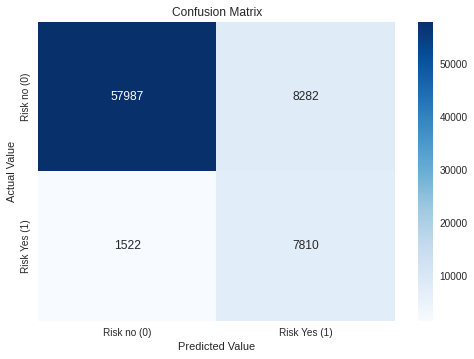

In [ ]:
predict_test = predict_model(best_model, raw_score=True)
plot_confusion_matrix(confusion_matrix(predict_test.risk_flag, predict_test.Label))

## D. Model Evaluation: Apakah model sudah best-fit?

In [ ]:
print(' ')
print('Data Train')
best_model = create_model('dt')
print('-------------------------')
print('Data Test')
predict_test=predict_model(best_model, raw_score=True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.8662  0.8429  0.8278  0.4742  0.6030  0.5295  0.5593
       1       0.8717  0.8507  0.8329  0.4869  0.6145  0.5439  0.5721
       2       0.8707  0.8528  0.8366  0.4848  0.6138  0.5427  0.5719
       3       0.8730  0.8550  0.8412  0.4900  0.6193  0.5494  0.5783
       4       0.8687  0.8554  0.8463  0.4803  0.6128  0.5409  0.5724
       5       0.8652  0.8528  0.8505  0.4729  0.6078  0.5343  0.5679
       6       0.8658  0.8515  0.8440  0.4740  0.6070  0.5337  0.5660
       7       0.8692  0.8517  0.8339  0.4814  0.6104  0.5385  0.5679
       8       0.8751  0.8567  0.8408  0.4950  0.6231  0.5542  0.5821
       9       0.8699  0.8536  0.8389  0.4829  0.6129  0.5414  0.5713
       Mean    0.8695  0.8523  0.8393  0.4822  0.6125  0.5408  0.5709
       Std     0.0031  0.0036  0.0064  0.0069  0.0056  0.0070  0.0060
Train  NaN     0.9262  0.9786  0.9994  0.6247  0.7688  0.7277  0.7561

-------------------------
Data Test


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8703,0.8517,0.8369,0.4853,0.6144,0.543,0.5721


- Nilai AUC train dan Recall Train memiliki nilai yang lebih besar dari nilai Test-nya dengan perbedaan yang sedikit. Namun, nilai Accuracy Train dengan nilai Accuracy Test memiliki perbedaan 0.0008. Jika dibulatkan sama-sama memiliki nilai 0.87.

- Dapat dikatakan bahwa model suda cukup *Best-Fit*.

## E. Hyperparameter Tuning

In [ ]:
params={'max_depth':[int(x) for x in np.linspace(1, 110, num = 30)], # Kedalaman maksimal tree
        'max_features':['auto','sqrt'], # Perhitungan untuk jumlah feature yang digunakan
        'min_samples_split':[2, 5, 10, 100, 200], # Minimum sampel yang diperlukan untuk split leaf baru
        'min_samples_leaf':[1, 2, 4, 10, 20, 50, 100] # minimum sampel yang diperlukan untuk membentuk leaf baru
        }

tuned_dt, tuner = tune_model(best_model, optimize='Accuracy', n_iter=50,
                             custom_grid=params, return_tuner=True, fold=10)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.8684  0.8628  0.8296  0.4793  0.6076  0.5353  0.5644
       1       0.8726  0.8626  0.8227  0.4888  0.6132  0.5428  0.5692
       2       0.8736  0.8700  0.8306  0.4914  0.6175  0.5477  0.5748
       3       0.8724  0.8681  0.8333  0.4885  0.6159  0.5456  0.5736
       4       0.8719  0.8676  0.8352  0.4875  0.6156  0.5451  0.5735
       5       0.8724  0.8678  0.8357  0.4887  0.6167  0.5464  0.5747
       6       0.8668  0.8665  0.8343  0.4760  0.6062  0.5332  0.5636
       7       0.8658  0.8580  0.8186  0.4732  0.5997  0.5259  0.5545
       8       0.8754  0.8696  0.8339  0.4957  0.6218  0.5529  0.5797
       9       0.8702  0.8640  0.8269  0.4833  0.6100  0.5385  0.5665
       Mean    0.8710  0.8657  0.8301  0.4852  0.6124  0.5413  0.5694
       Std     0.0029  0.0036  0.0054  0.0068  0.0062  0.0076  0.0070
Train  NaN     0.9154  0.9712  0.9501  0.5980  0.7340  0.6868  0.7128

In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=57, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=417, splitter='best')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8702,0.8655,0.8324,0.485,0.6129,0.5414,0.5699


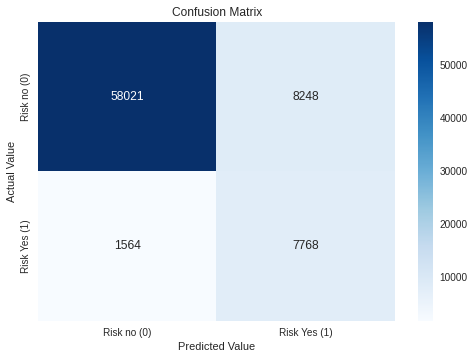

In [ ]:
predict_test_tuned = predict_model(tuned_dt, raw_score=True)
plot_confusion_matrix(confusion_matrix(predict_test_tuned.risk_flag, predict_test_tuned.Label))

- Model hasil Hyperparameter Tuning memiliki nilai Accuracy Train, AUC Train, dan Recall lebih tinggi dari nilai Test-nya dengan perbedaan nilai yang kecil. Menandakan bahwa model hasil hypertuning tidak *overfitting* maupun *underfitting*.

- Model yang dipilih dapat mendeteksi customer yang beresiko. Terlihat dari nilai Recall yang tinggi untuk meminimalisir kesalahan dalam memprediksi customer yang sebenarnya beresiko tetapi diprediksi tidak beresiko. Dari nilai AUC-nya, model memiliki nilai yang tinggi menandakan bahwa performa model sudah bagus.

# **2. Feature Importance**

In [ ]:
X_train = s[17][1][1]
y_train = s[17][2][1]
feature_names = list(X_train.columns)

In [ ]:
list_ = [x for x in X_train.columns]
X_train_feature = X_train[list_]

In [ ]:
import shap

shap_values = shap.TreeExplainer(best_model,
                                 data = X_train_feature,
                                 feature_dependence = 'independent',
                                 model_output = 'probability').shap_values(X_train_feature)

100%|===================| 351856/352798 [06:09<00:00]       

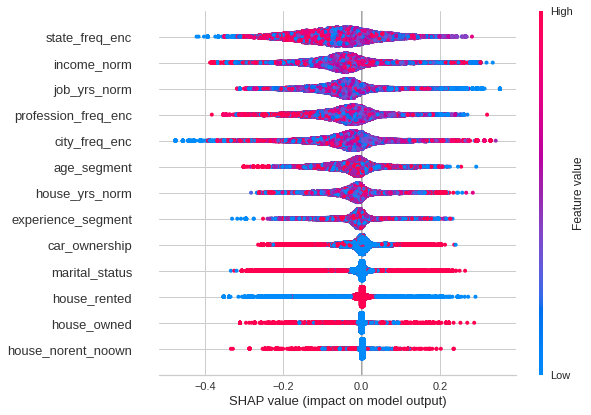

In [ ]:
interpret_model(tuned_dt, use_train_data=True)

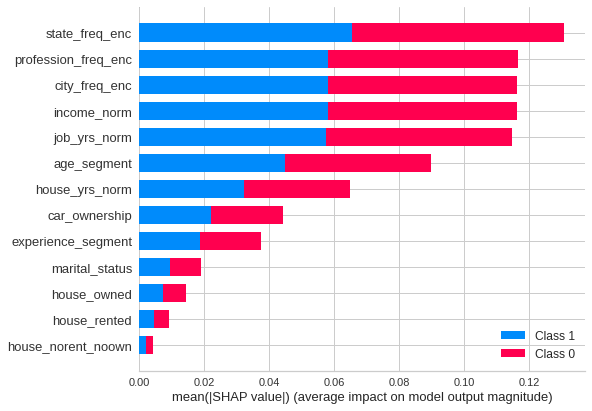

In [ ]:
shap.summary_plot(shap_values, X_train_feature, feature_names = feature_names)

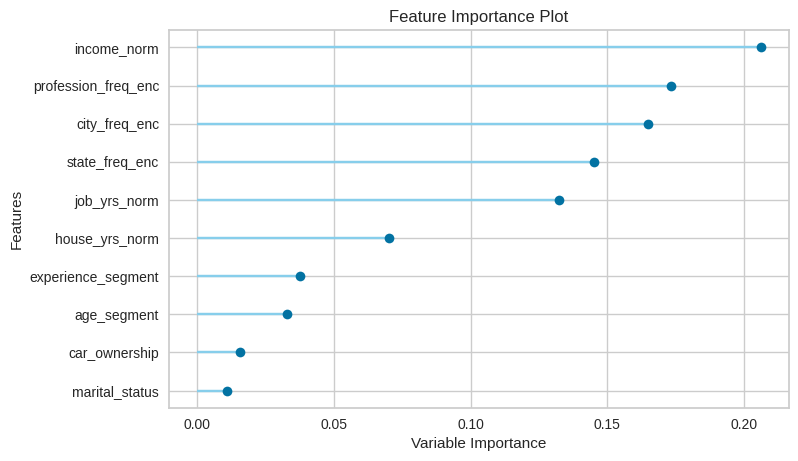

In [ ]:
plot_model(tuned_dt, plot="feature")

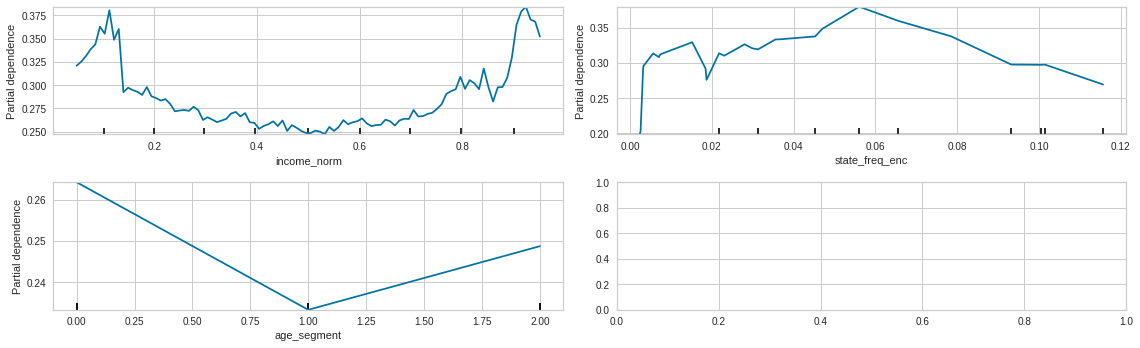

In [ ]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

# We try to compare 4 features using partial dependence
fig, ax = plt.subplots(2,2, figsize=(16, 5))
plot_partial_dependence(tuned_dt, X_train,["income_norm"], ax=ax[0,0])
plot_partial_dependence(tuned_dt, X_train,["state_freq_enc"], ax=ax[0,1])
plot_partial_dependence(tuned_dt, X_train,["age_segment"], ax=ax[1,0])
plt.tight_layout()
plt.show()

Beberapa feature yang berpengaruh adalah income, state, dan age.

- Income customer yang memiliki pendapat tidak terlalu rendah dan tidak terlalu tinggi mempunyai probability lebih rendah beresiko. Oleh karena itu, dapat menyesuaikan pinjaman sesuai dengan pendapatan customer.

- State Uttar Paradesh mempunyai populasi yang tinggi dengan probability lebih rendah beresiko. Oleh karena itu, dapat melakaukan marketing di State tersebut.

- Segment umur 40 -59 tahun memiliki probability lebih rendah beresiko. Oleh karena itu, dapat memprioritaskan customer yang memiliki range umur 40 - 59.